# TSF Task 3: To Explore Decision Tree Algorithm

## Analyze Data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,precision_score,recall_score
from sklearn.tree import plot_tree

In [83]:
df_iris=pd.read_csv("Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [85]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [86]:
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
df=pd.get_dummies(df_iris)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [88]:
df.columns
df.columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica']
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [89]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


## Data Visualization

Text(0, 0.5, 'Sepal Length (in Cm)')

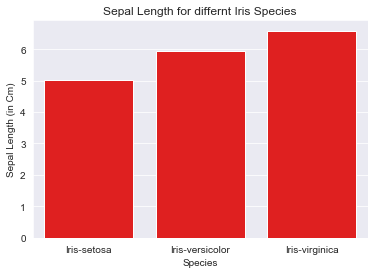

In [90]:
%matplotlib inline
sns.set_style("darkgrid")
sns.barplot(df_iris.Species,df_iris.SepalLengthCm,color='red',ci=None)
plt.title("Sepal Length for differnt Iris Species")
plt.ylabel("Sepal Length (in Cm)")

Text(0, 0.5, 'Sepal Width (in Cm)')

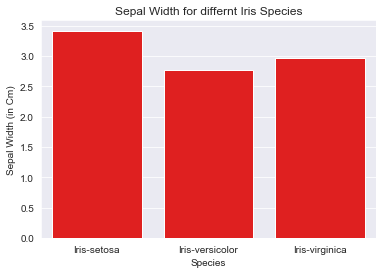

In [91]:
sns.barplot(df_iris.Species,df_iris.SepalWidthCm,color='red',ci=None)
plt.title("Sepal Width for differnt Iris Species")
plt.ylabel("Sepal Width (in Cm)")

Text(0, 0.5, 'Petal Length (in Cm)')

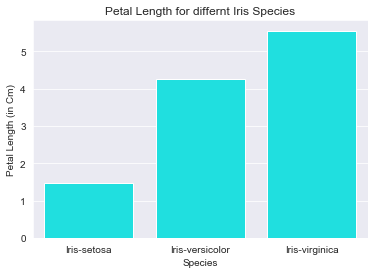

In [92]:
sns.barplot(df_iris.Species,df_iris.PetalLengthCm,color='cyan',ci=None)
plt.title("Petal Length for differnt Iris Species")
plt.ylabel("Petal Length (in Cm)")

Text(0, 0.5, 'Petal Width (in Cm)')

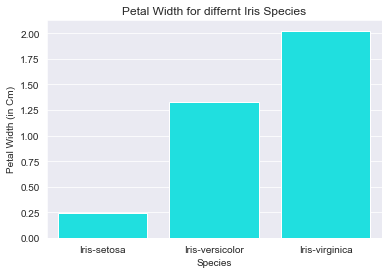

In [93]:
sns.barplot(df_iris.Species,df_iris.PetalWidthCm,color='cyan',ci=None)
plt.title("Petal Width for differnt Iris Species")
plt.ylabel("Petal Width (in Cm)")

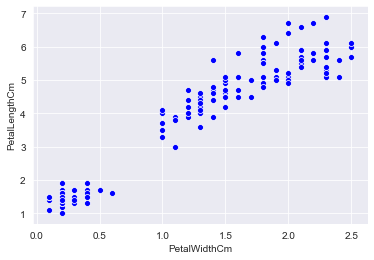

In [94]:
sns.scatterplot(df_iris.PetalWidthCm,df_iris.PetalLengthCm,color='blue')

Linear relationship between Petal Length and Petal Width

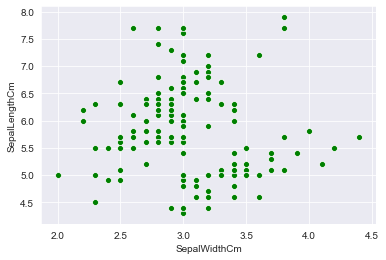

In [95]:
sns.scatterplot(df_iris.SepalWidthCm,df_iris.SepalLengthCm,color='green')

We can understand from scatter plot that for same width of sepal , sapal length varies.

## Spliting data into Training and Validation Set

In [96]:
df.shape

(150, 8)

In [97]:
col_x=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
col_y=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
X=df[col_x]
y=df[col_y]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [98]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
126,6.2,2.8,4.8,1.8
22,4.6,3.6,1.0,0.2
44,5.1,3.8,1.9,0.4
97,6.2,2.9,4.3,1.3


In [99]:
y_train.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
8,1,0,0
126,0,0,1
22,1,0,0
44,1,0,0
97,0,1,0


## Decision Tree Classifier

In [100]:
dtc=DecisionTreeClassifier(max_depth=3,random_state=0)
dtc.fit(X_train,y_train)
print("Training Score :",dtc.score(X_train,y_train))
print("Test Score :",dtc.score(X_test,y_test))

Training Score : 0.968503937007874
Test Score : 1.0


Text(0.5, 1.0, 'Decision Tree ')

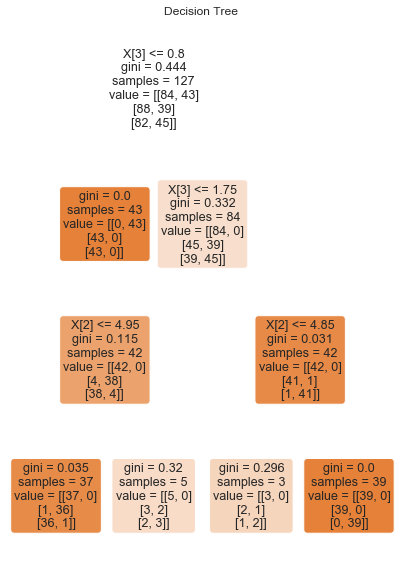

In [101]:
plt.figure(figsize=(7,10))
p=plot_tree(dtc,filled=True,rounded=True)
plt.title("Decision Tree ")

In [102]:
ypred=dtc.predict(X_test)
roc_score=roc_auc_score(ypred,y_test)
print("Roc Score :",roc_score)

Roc Score : 1.0


array([0.       , 0.       , 0.0445355, 0.9554645])

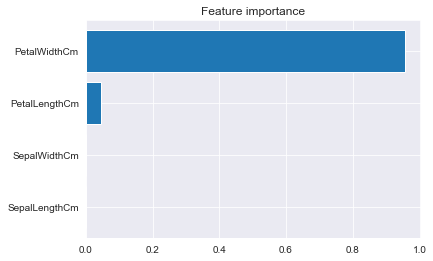

In [103]:
imp=dtc.feature_importances_
index=np.argsort(imp)[::-1]
fig,ax=plt.subplots()
ax.barh(range(4),imp)
plt.yticks(range(4),col_x)
plt.title("Feature importance")
imp

Petal width is the important  feature which contributed most in identifying different species of iris

In [104]:
precision_score=precision_score(y_test,ypred,average='macro')
print("Precision Score :",precision_score)
recall_score=recall_score(y_test,ypred,average='macro')
print("Recall Score :",precision_score)

Precision Score : 1.0
Recall Score : 1.0


 A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally)

### Summary of Decision Tree Classifier :

 Accuracy on Training data :0.968  <br>
 Accuracy on Test data :1.0   <br>
 Roc Score : 1.0    <br>
 Precision Score :1.0  <br>
 Recall Score :1.0  <br>
 Import Features: <br>
     1.Petal Width(in cm) <br>
     2.Petal Length(in cm)